In [ ]:
#import system files
import sys
# !{sys.executable} -m pip install pandas

In [ ]:
#load libraries
import pandas as pd
import math


In [ ]:
#load the activity dataset
df1 = pd.read_csv("/Users/whitegg/Documents/GitHub/Project/FinalSemesterProject/ehact_2014.csv")
df1

In [ ]:
#load respondent dataset
df2 = pd.read_csv("/Users/whitegg/Documents/GitHub/Project/FinalSemesterProject/ehresp_2014.csv")
df2

In [ ]:
#load weight dataset
df3 = pd.read_csv("/Users/whitegg/Documents/GitHub/Project/FinalSemesterProject/ehwgts_2014.csv")
df3

In [ ]:
#filter bmi, height and weight
df = df2[["erbmi", "euhgt", "euwgt"]]
df

In [ ]:
#check information about the dataset
df.info()

In [ ]:
#check the distribution of the dataset
df.describe()

In [ ]:
#remove duplicate
df = df.drop_duplicates()

In [ ]:
#check the dataset after duplicate removal
df.info()

In [ ]:
#filter heights less than 21 and weight less than 5
df = df[(df.euhgt > 21) & (df.euwgt > 5)]
df

In [ ]:
#Check resulting dataset
df.info()

In [ ]:
#check for na values
df.isna().value_counts()

In [ ]:
#drop na values
df = df.dropna(thresh=len(df.columns) // 2)

In [ ]:
#check result after na was removed
df.info()

In [ ]:
#recheck the distribution of the dataset
df.describe()

In [ ]:
#check the correlations of the features in the dataset
correlation_matrix = df.corr()
print(correlation_matrix)


In [ ]:
#Apply Linear Regression to check intercept and coefficient

from sklearn.linear_model import LinearRegression

X = df[["euhgt", "euwgt"]]
y = df["erbmi"]

model = LinearRegression()
model.fit(X, y)

# Check the coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


In [ ]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns



# List of columns to check for outliers
columns = ['erbmi', 'euhgt', 'euwgt']

# Create a figure and axis for each boxplot
plt.figure(figsize=(15, 5))

for i, column in enumerate(columns):
    plt.subplot(1, len(columns), i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [ ]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns

#plot histogram to to diplay the distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['erbmi'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.savefig("Distribution of BMI") 
plt.show()



In [ ]:
#plot scatter to to diplay the relationship of Height and BMI

plt.figure(figsize=(10, 6))
sns.scatterplot(x='euhgt', y='erbmi', data=df, color='blue')
plt.title('Height vs BMI')
plt.xlabel('Height (in inches)')
plt.ylabel('BMI')
plt.savefig("Height vs BMI") 
plt.show()



In [ ]:
#plot scatterplot to diplay the relationship of Weight and BMI

plt.figure(figsize=(10, 6))
sns.scatterplot(x='euwgt', y='erbmi', data=df, color='green')
plt.title('Weight vs BMI')
plt.xlabel('Weight (in pounds)')
plt.ylabel('BMI')
plt.savefig("Weight vs BMI") 
plt.show()




In [ ]:
#plot jointplot to diplay the relationship of Height, Weight and BMI

sns.jointplot(x='euhgt', y='euwgt', data=df, kind='scatter', hue='erbmi', palette='coolwarm', height=8)
plt.title('Joint Plot of Height and Weight colored by BMI')
plt.xlabel('Height (in inches)')
plt.ylabel('Weight (in pounds)')
plt.savefig("Joint Plot of Height and Weight colored by BMI") 
plt.show()



In [ ]:
#plot pairplot to diplay the relationship of Height, Weight and BMI
sns.pairplot(df[['euhgt', 'euwgt', 'erbmi']], kind='reg', diag_kind='kde', height=3)
plt.suptitle('Pairwise Relationships', y=1.02)
plt.savefig("Pairwise Relationships") 
plt.show()


In [ ]:
#visualize the correlation of the features
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.savefig("Feature Correlation Matrix") 
plt.show()



In [ ]:

dframe = df.copy()
dframe

In [ ]:
#import Library
import pandas as pd

# Define the function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal Weight'
    elif 25 <= bmi <= 29.9:
        return 'Overweight'
    elif bmi >= 30:
        return 'Obese'
    else:
        return 'Invalid'

# Apply the function to create a new column in the DataFrame
df['bmi_category'] = df['erbmi'].apply(categorize_bmi)

# Display the first few rows to verify
# print(df[['erbmi', 'bmi_category']].head())


In [ ]:
df

In [ ]:
df.bmi_category.value_counts()

In [ ]:
from sklearn.preprocessing import StandardScaler
# Normalization of height and weight
scaler = StandardScaler()
df[['euhgt', 'euwgt']] = scaler.fit_transform(df[['euhgt', 'euwgt']])

In [ ]:
print(df.describe())

In [ ]:
# Count the number of occurrences in each BMI category
bmi_counts = df['bmi_category'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=bmi_counts.index, y=bmi_counts.values, palette='viridis')

# Add titles and labels
plt.title('Distribution of BMI Categories', fontsize=16)
plt.xlabel('BMI Category', fontsize=14)
plt.ylabel('Number of Individuals', fontsize=14)
plt.savefig("Distribution of BMI Categories") 
# Show the plot
plt.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA on BMI categories
model = ols('erbmi ~ C(bmi_category)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Post-hoc test
tukey = pairwise_tukeyhsd(df['erbmi'], df['bmi_category'], alpha=0.05)
print(tukey)

In [ ]:
tukey.plot_simultaneous()
plt.title('Tukey HSD Test for Weight across BMI Categories')
plt.savefig("Tukey HSD Test for Weight across BMI Categories") 
plt.show()

In [ ]:
from scipy.stats import f_oneway

# Group the data by BMI categories
underweight = df[df['bmi_category'] == 'Underweight']['euwgt']
normal_weight = df[df['bmi_category'] == 'Normal Weight']['euwgt']
overweight = df[df['bmi_category'] == 'Overweight']['euwgt']
obese = df[df['bmi_category'] == 'Obese']['euwgt']

# Perform ANOVA
f_stat, p_value = f_oneway(underweight, normal_weight, overweight, obese)
print(f"F-statistic: {f_stat}, P-value: {p_value}")


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# Model Training and Evaluation

X = df[['euhgt', 'euwgt']]
y = df['erbmi']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'R2': r2,
        'MAE': mae,
        'RMSE': rmse,
        'MSE': mse
    }

# Print the results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  R2 = {metrics['R2']}")
    print(f"  MAE = {metrics['MAE']}")
    print(f"  RMSE = {metrics['RMSE']}")
    print(f"  MSE = {metrics['MSE']}")



In [ ]:
# Optional: Hyperparameter Tuning (Example with Random Forest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(f"Best parameters for Gradient Boosting: {grid_search.best_params_}")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Split the data into training and test sets
X = df[['euhgt', 'euwgt']]
y = df['erbmi']
y_category = df['bmi_category']  # Actual BMI categories

X_train, X_test, y_train, y_test, y_train_category, y_test_category = train_test_split(X, y, y_category, test_size=0.2, random_state=42)

# Initialize dictionaries to store metrics
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal Weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    elif bmi >= 30:
        return 'Obese'
    else:
        return 'Invalid'

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Convert the predicted BMI to categories
    y_pred_category = [categorize_bmi(bmi) for bmi in y_pred]
    
    # Calculate metrics
    accuracy_scores[name] = accuracy_score(y_test_category, y_pred_category)
    precision_scores[name] = precision_score(y_test_category, y_pred_category, average='weighted')
    recall_scores[name] = recall_score(y_test_category, y_pred_category, average='weighted')
    f1_scores[name] = f1_score(y_test_category, y_pred_category, average='weighted')

# Display the results
print("Model Performance Metrics:")
for name in models.keys():
    print(f"\n{name}:")
    print(f"  Accuracy: {accuracy_scores[name]}")
    print(f"  Precision: {precision_scores[name]}")
    print(f"  Recall: {recall_scores[name]}")
    print(f"  F1-Score: {f1_scores[name]}")


In [ ]:
!{sys.executable} -m pip install statsmodels

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# Ensure that BMI categories are correctly assigned
df['bmi_category'] = df['erbmi'].apply(categorize_bmi)

# Create a DataFrame for the Tukey HSD test
data_for_tukey = df[['euwgt', 'bmi_category']]
data_for_tukey = data_for_tukey.dropna()  # Drop any missing values if necessary


In [ ]:
tukey = pairwise_tukeyhsd(endog=data_for_tukey['euwgt'],
                          groups=data_for_tukey['bmi_category'],
                          alpha=0.05)

# Print the results
print(tukey)


In [ ]:
tukey.plot_simultaneous()
plt.title('Tukey HSD Test for Weight across BMI Categories')
plt.show()


In [ ]:
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

In [ ]:

!{sys.executable} -m pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np


# Handle missing and invalid values
df = df[(df['euhgt'] > 0) & (df['euwgt'] > 0)]

# Features and target
X = df[['euhgt', 'euwgt']]
y = df['erbmi']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

# Print the results
for name, mse in results.items():
    print(f"{name}: MSE = {mse}")

# Find the best model based on MSE
best_model_name = min(results, key=results.get)
print(f"Best model: {best_model_name} with MSE = {results[best_model_name]}")


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Train and evaluate each model using R², MAE, and RMSE

regression_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store the results
    regression_results[name] = {
        'R²': r2,
        'MAE': mae,
        'RMSE': rmse
    }

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(regression_results).T

# Display the results
print(results_df)

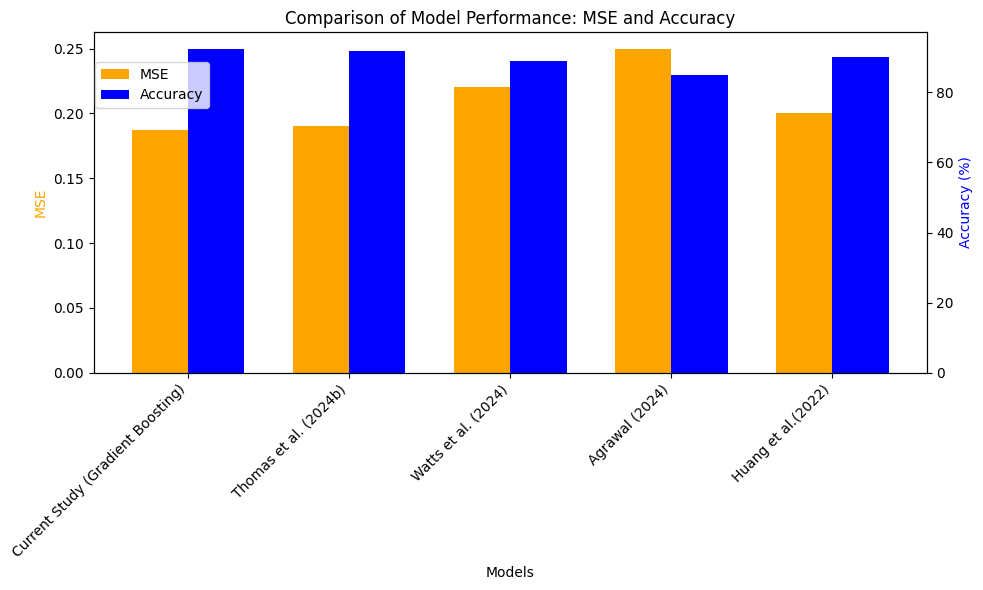

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the plot
models = [
    "Current Study (Gradient Boosting)", 
    "Thomas et al. (2024b)", 
    "Watts et al. (2024)", 
    "Agrawal (2024)", 
    "Huang et al.(2022)"
]
mse_values = [0.1868, 0.1900, 0.2200, 0.2500, 0.2000]
accuracy_values = [92.5, 91.7, 89.0, 85.0, 90.0]

# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set positions for the bars
x = np.arange(len(models))
width = 0.35  # width of the bars

# Plot MSE bars
bar1 = ax1.bar(x - width/2, mse_values, width, label='MSE', color='orange')

# Plot Accuracy bars
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, accuracy_values, width, label='Accuracy', color='blue')

# Labels and Titles
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE', color='orange')
ax2.set_ylabel('Accuracy (%)', color='blue')
ax1.set_title('Comparison of Model Performance: MSE and Accuracy')

# Set x-axis labels and rotate
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha="right")

# Adding a legend
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.tight_layout()
plt.savefig("Comparison of Model Performance: MSE and Accuracy") 
plt.show()
